## Shaharyar Hussain

## Importing Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [7]:
df = pd.read_csv('C:/Users/Shaharyar_PC/Desktop/BDA/Store.csv')

## Data Viewing

In [8]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [9]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [54]:
df.shape

(896, 5)

## Checking if there is any null value in columns 

In [11]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [12]:
df.duplicated().value_counts()

False    896
dtype: int64

## Plotting various Graphs 

## Histogram (w.r.t. Counts)

<AxesSubplot:xlabel='Store_Sales', ylabel='Count'>

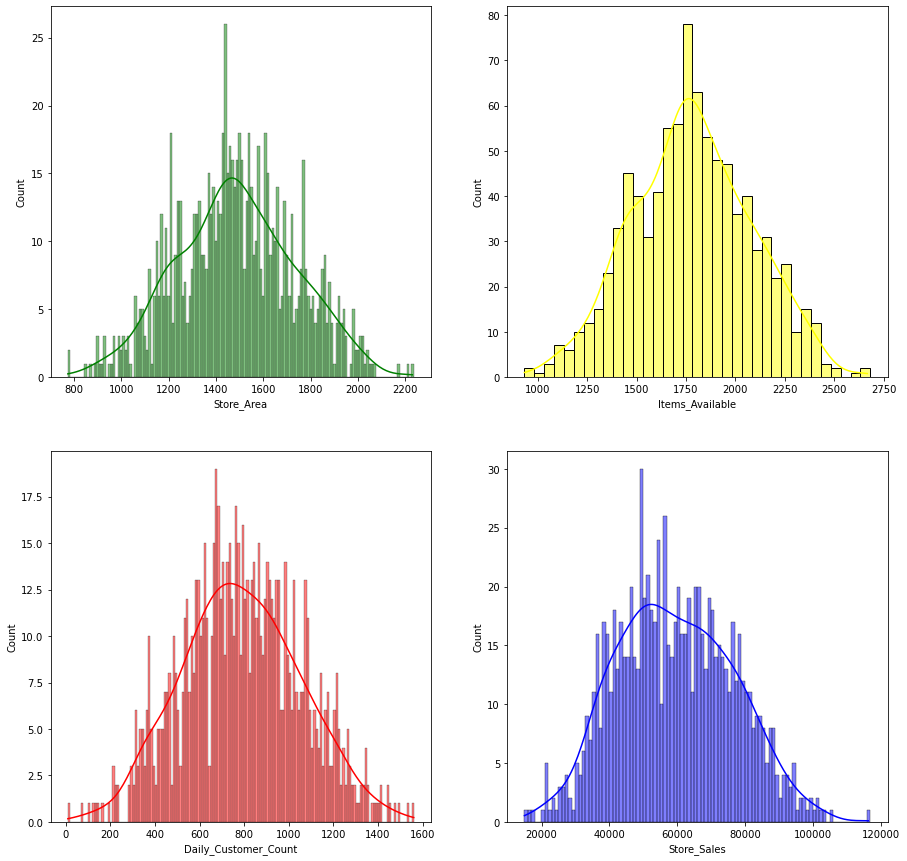

In [22]:
fig,axes = plt.subplots(2,2,figsize=(15,15))
sns.histplot(data = df, x = 'Store_Area',binwidth = 10,color = "green",kde=True,ax=axes[0,0])
sns.histplot(data = df, x = 'Items_Available',binwidth = 50,color = "yellow",kde=True,ax=axes[0,1])
sns.histplot(data = df, x = 'Daily_Customer_Count',binwidth = 10,color = "red",kde=True,ax=axes[1,0])
sns.histplot(data = df, x = 'Store_Sales',binwidth = 1000,color = "blue",kde=True,ax=axes[1,1])

## Heatmap for correlation in parameters

Text(0.5, 1.0, 'Correlation')

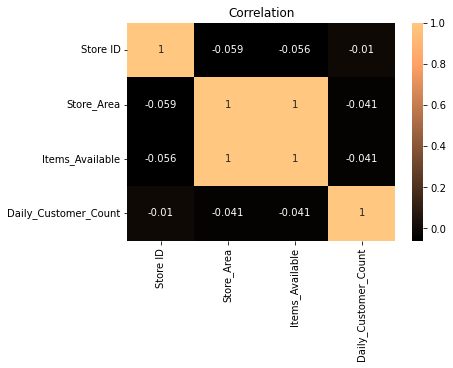

In [44]:
sns.heatmap(df.iloc[:,:4].corr(),annot=True, cmap='copper')
plt.title('Correlation')

## Scatterplot (Store Area vs Items Available relation)

<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

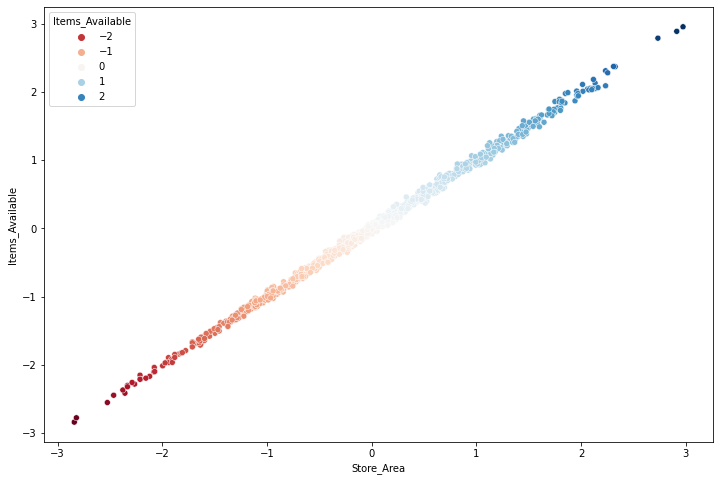

In [112]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.Store_Area, y = df.Items_Available, hue=df.Items_Available,palette='RdBu')

## Lineplot for viewing trend similarity

<AxesSubplot:>

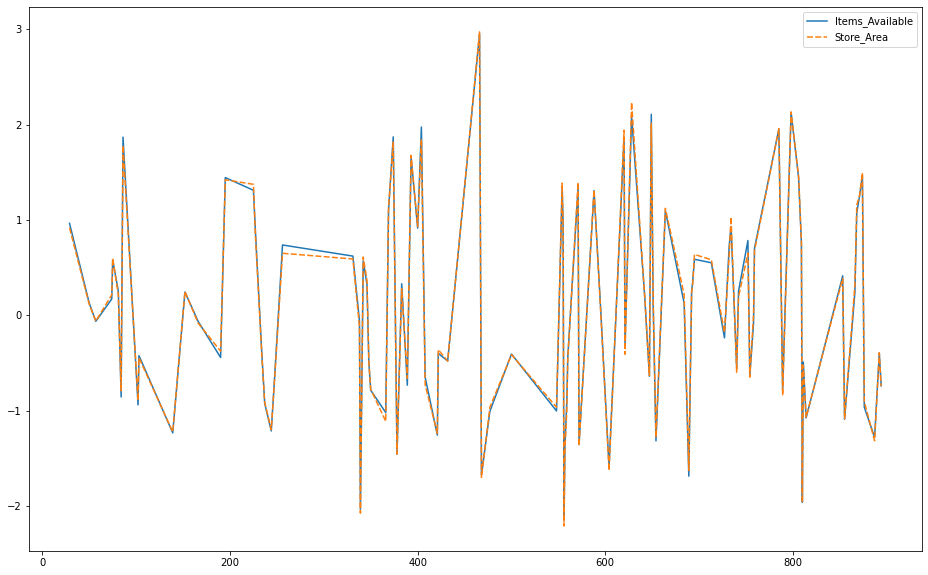

In [97]:
plt.figure(figsize=(16,10))
#plt.lineplot('Items_Available', 'Store_Area', data=df.head(100), linestyle='-', marker='o')
sns.lineplot(data=(df[['Items_Available','Store_Area']]).head(100))

## Correlation with other attributes

<AxesSubplot:title={'center':'First 5% Stores'}>

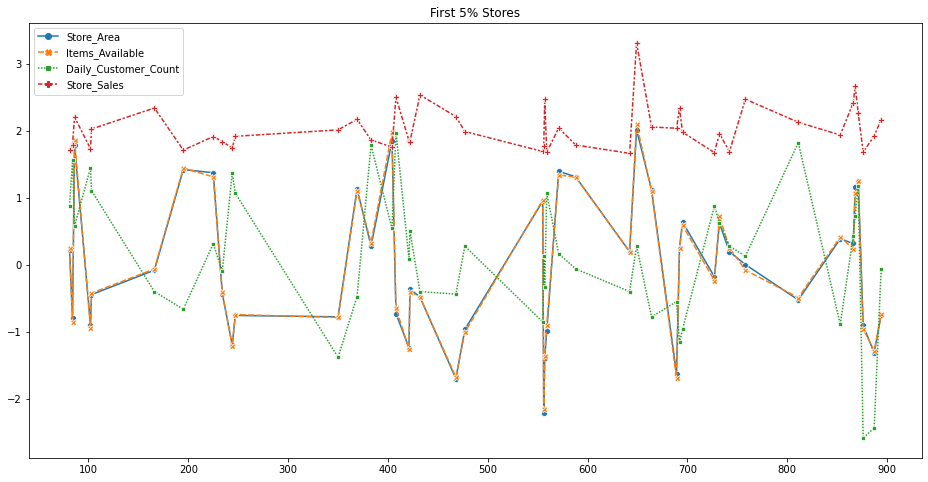

In [62]:
df.sort_values(by = 'Store_Sales', ascending=False, inplace=True)
features=['Store_Area', 'Items_Available','Daily_Customer_Count','Store_Sales']

from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(16,8))
plt.title("First 5% Stores")

#Standarization
ss = StandardScaler()
df[features] = ss.fit_transform(df[features])

sns.lineplot(data=df[features].head(45),markers=True )

### High Store Sales

In [70]:
sales = df.sort_values(by='Store_Sales',ascending=False)
sales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,2.013578,2.108623,0.277670,3.315768
868,869,1.157911,1.074272,0.730089,2.665637
432,433,-0.481451,-0.480592,-0.400958,2.535843
408,409,-0.729354,-0.650760,1.974240,2.500339
758,759,0.002361,-0.080198,0.126864,2.471820
...,...,...,...,...,...
352,353,-0.353501,-0.320434,0.239969,-2.214713
593,594,0.554146,0.547086,0.315372,-2.274662
775,776,0.206281,0.316860,-0.476361,-2.425991
852,853,-0.033625,0.026574,0.353073,-2.501655


In [71]:
sales.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,8.960000e+02,8.960000e+02,8.960000e+02,8.960000e+02
mean,448.500000,-7.595611e-17,-9.664888e-18,-8.549709e-18,2.156013e-16
std,258.797218,1.000559e+00,1.000559e+00,1.000559e+00,1.000559e+00
min,1.000000,-2.840533e+00,-2.836245e+00,-2.926961e+00,-2.586050e+00
25%,224.750000,-6.743758e-01,-6.891308e-01,-7.025699e-01,-7.462428e-01
50%,448.500000,-3.362530e-02,-2.848042e-02,-2.394216e-02,-4.343749e-02
75%,672.250000,6.720999e-01,6.697069e-01,6.923871e-01,7.287753e-01
max,896.000000,2.973204e+00,2.952788e+00,2.916778e+00,3.315768e+00


<AxesSubplot:xlabel='Items_Available', ylabel='Store_Sales'>

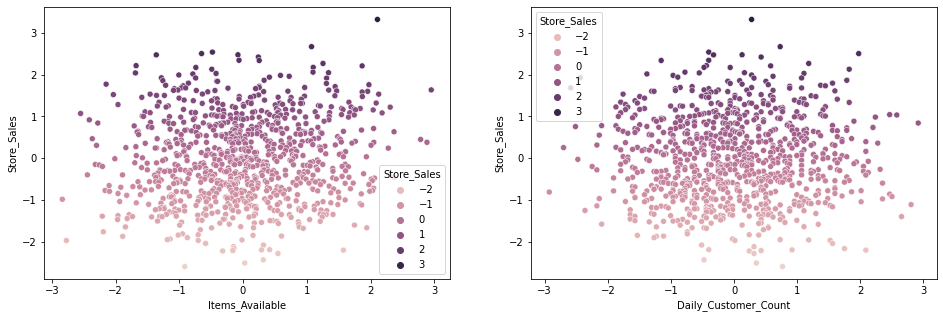

In [101]:
fig,axes = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(x=sales['Daily_Customer_Count'],y=sales['Store_Sales'],hue=sales['Store_Sales'])
sns.scatterplot(x=sales['Items_Available'],y=sales['Store_Sales'],hue=sales['Store_Sales'],ax=axes[0])

## Histplot

<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Store_Sales'>

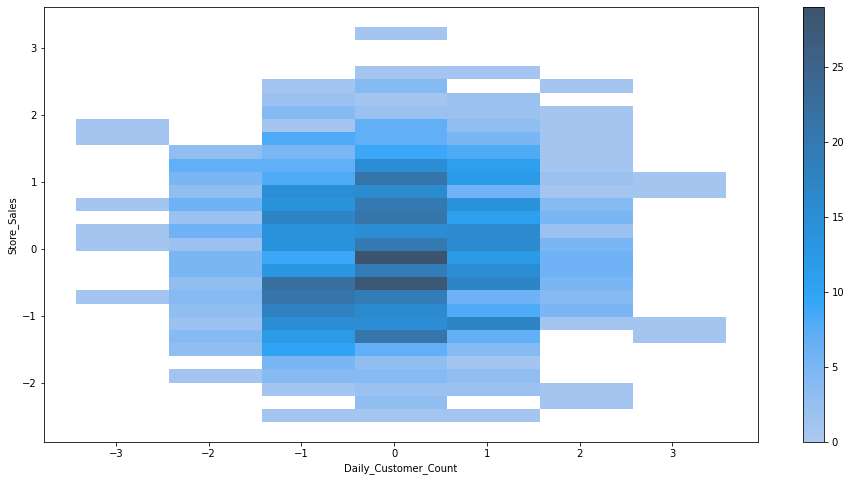

In [110]:
plt.figure(figsize=(16,8))
sns.histplot(x=sales['Daily_Customer_Count'],y=sales['Store_Sales'],bins=30, discrete=(True, False),
    cbar=True)

## Pairplot

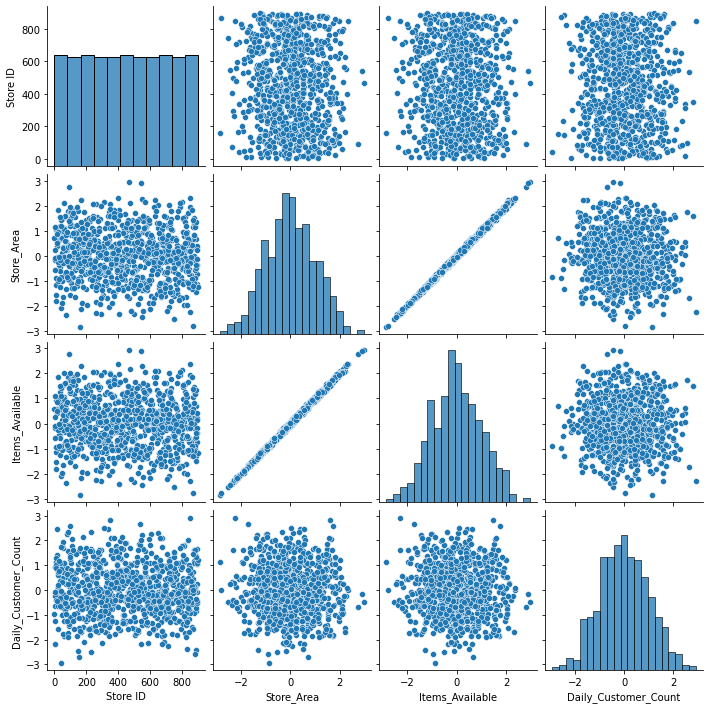

In [111]:
sns.pairplot(data=df.iloc[:,:4])